In [1]:
from ipywidgets import interact

In [2]:
def f(x):
    print(x + 5)
    return x
interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipympl

from typing import List, Optional, Tuple

In [82]:
# create object for link

class Link:
    
    def __init__(self, rotation_axis: str, link_length: float, 
                 prelim_rotation: Optional[List] = None, inline=False) -> object:
        self.axis = rotation_axis
        self.length = link_length
        self.prelim_rotation = prelim_rotation
        self.inline = inline
            

    def _cx(self, x: float) -> np.ndarray: 
        return np.array([[1,0,0], 
                        [0,np.cos(x),-np.sin(x)], 
                        [0,np.sin(x),np.cos(x)]])

    def _cy(self, x:float) -> np.ndarray: 
        return np.array([[np.cos(x),0,np.sin(x)],
                        [0,1,0], 
                        [-np.sin(x),0,np.cos(x)]])

    def _cz(self, x: float) -> np.ndarray: 
        return np.array([[np.cos(x),-np.sin(x),0],
                        [np.sin(x),np.cos(x),0],
                        [0,0,1]])
    
    def build_h(self, theta: float):
    
        rotation_functions = [self._cx, self._cy, self._cz]
        rotation_letters = ["x", "y", "z"]

        # find rotation
        rotation = rotation_letters.index(self.axis)
        C = rotation_functions[rotation](theta)

        # add preliminary rotation
        if self.prelim_rotation:
            rotation = rotation_letters.index(self.prelim_rotation[0])
            C = C @ rotation_functions[rotation](self.prelim_rotation[1])

        # create translational component
        if self.inline:
            translation = np.array([self.length,0,0]).reshape(-1,1)
        else: 
            translation = np.array([self.length * np.cos(theta), 
                                    self.length*np.sin(theta), 
                                    0]).reshape(-1,1)
        # create H bottom row
        bottom_row = np.array([0,0,0,1])

        # combine parts
        self._H = np.hstack([C, translation])
        self._H = np.vstack([self._H, bottom_row])
    
        return self._H

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.8369702e-15  3.0000000e+01  0.0000000e+00]
 [-2.0000000e+01  3.0000000e+01  0.0000000e+00]
 [-2.0000000e+01  3.0000000e+01 -5.0000000e+00]
 [-2.0000000e+01  3.0000000e+01 -8.0000000e+00]]


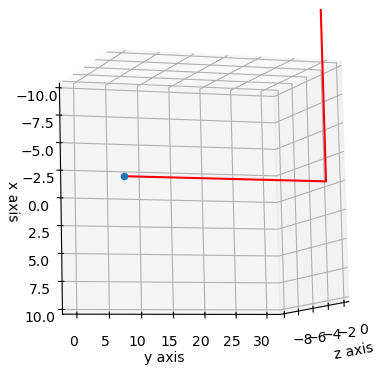

<Figure size 640x480 with 0 Axes>

In [93]:
class FourLinkArm:
    
    def __init__(self, link1: object, link2: object, link3: object, link4: object) -> object:
        self.link1 = link1
        self.link2 = link2
        self.link3 = link3
        self.link4 = link4
        self.kinematic_chain = [link1, link2, link3, link4]
    
    def get_coordinates(self, joint_angels: List[float]) -> np.ndarray:
        
        joint_coordinates = []
        
        for i in range(len(self.kinematic_chain)):
            
            H_total = np.eye(4)
            
            for j in range(i+1):
                
                current_link = self.kinematic_chain[j]
                theta = joint_angels[j]
                H_link = current_link.build_h(theta)
                H_total =  H_total @ H_link

            joint_coordinates.append(H_total[:3, 3])
            
        self._joint_coordinates = np.array(joint_coordinates)
        return self._joint_coordinates
    
    def plot_arm(self, joint_angels: List[float]) -> None:
        
        coordinate_matrix = self.get_coordinates(joint_angels)
        coordinate_matrix = np.vstack([np.array([0,0,0]), coordinate_matrix])

        print(coordinate_matrix)
        
        x_coords = coordinate_matrix[:, 0]
        y_coords = coordinate_matrix[:, 1]
        z_coords = coordinate_matrix[:, 2]
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(0,0,0)
        plot = ax.plot(x_coords, y_coords, z_coords, color="red")

        ax.view_init(111, 111, 111)
        ax.set_xlim([-10, 10])

        ax.set_xlabel("x axis")
        ax.set_ylabel("y axis")
        ax.set_zlabel("z axis")
        
        %matplotlib inline
        plt.show()
        
        plt.clf()
        
link1 = Link("z", 30)
link2 = Link("z", 20, ("x", -np.pi/2))
link3 = Link("z", 5)
link4 = Link("x", 3, inline=True)

arm = FourLinkArm(link1, link2, link3, link4)

arm.plot_arm([np.pi/2,np.pi/2,np.pi/2,np.pi/2])

In [75]:
link1 = Link("z", 30)
link2 = Link("z", 20, ("x", -np.pi/2))
link3 = Link("z", 5)
# link4 = Link("x", 3)

# H = link3.build_h(0) @ link2.build_h(0) @ 
H = link1.build_h(np.pi/2) @ link2.build_h(0) @ link3.build_h(0)
H[:3, 3]

array([3.3677787e-15, 5.5000000e+01, 0.0000000e+00])

In [7]:
# from matplotlib.widgets import Slider

# # Define data set

# DATA = np.random.uniform(1, 10, 300).reshape(-1, 3)
# X_VALUES = np.arange(3)

# # Initial plot

# fig, ax = plt.subplots()
# plt.subplots_adjust(bottom=0.15)
# ax.plot(X_VALUES, DATA[0], '-o')

# # Update function


# def update_wave(val):
#     idx = int(sliderwave.val)
#     ax.cla()
#     ax.plot(X_VALUES, DATA[idx], '-o')
#     fig.canvas.draw_idle()


# # Sliders

# axwave = plt.axes([0.25, 0.05, 0.5, 0.03])

# sliderwave = Slider(axwave, 'Event No.', 0, 100, valinit=0, valfmt='%d')
# sliderwave.on_changed(update_wave)

# %matplotlib widget
# plt.show(fig)

In [8]:
import ipympl
!conda list ipympl

# packages in environment at /Users/willa/anaconda3:
#
# Name                    Version                   Build  Channel
ipympl                    0.9.3           py311hca03da5_0  
